In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading Data
train=pd.read_csv("loan_approval_data.csv") 
test=pd.read_csv("loan_approval_data.csv")

In [4]:
# Data dimension - train data
print('Data dimension: {} rows and {} columns'.format(len(train), len(train.columns)))
train.head()

Data dimension: 614 rows and 13 columns


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [5]:
# Data dimension - test data
print('Data dimension: {} rows and {} columns'.format(len(test), len(test.columns)))
test.head()

Data dimension: 614 rows and 13 columns


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [6]:
train_original=train.copy() 
test_original=test.copy()

In [7]:
#Understanding the Data train data
train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [8]:
#Understanding the Data test data
test.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [9]:
train.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [10]:
test.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [11]:
train.shape, test.shape

((614, 13), (614, 13))

In [12]:
#Univariate Analysis
train['loan_status'].value_counts()

loan_status
y    422
n    192
Name: count, dtype: int64

In [13]:
train['loan_status'].value_counts(normalize=True)

loan_status
y    0.687296
n    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='loan_status'>

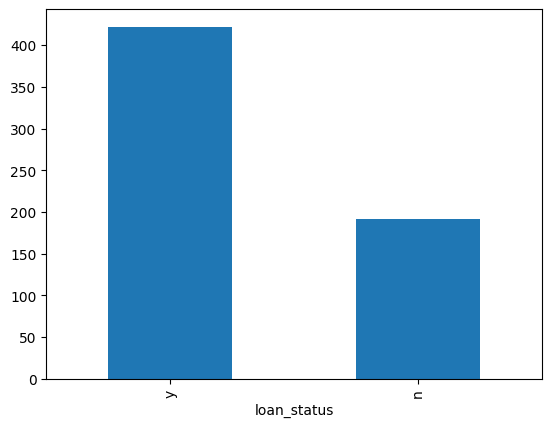

In [14]:
train['loan_status'].value_counts().plot.bar()

In [15]:
#Data preprocessing - Training data 
# Data frame metadata
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [16]:
import matplotlib
import matplotlib.pyplot as plt

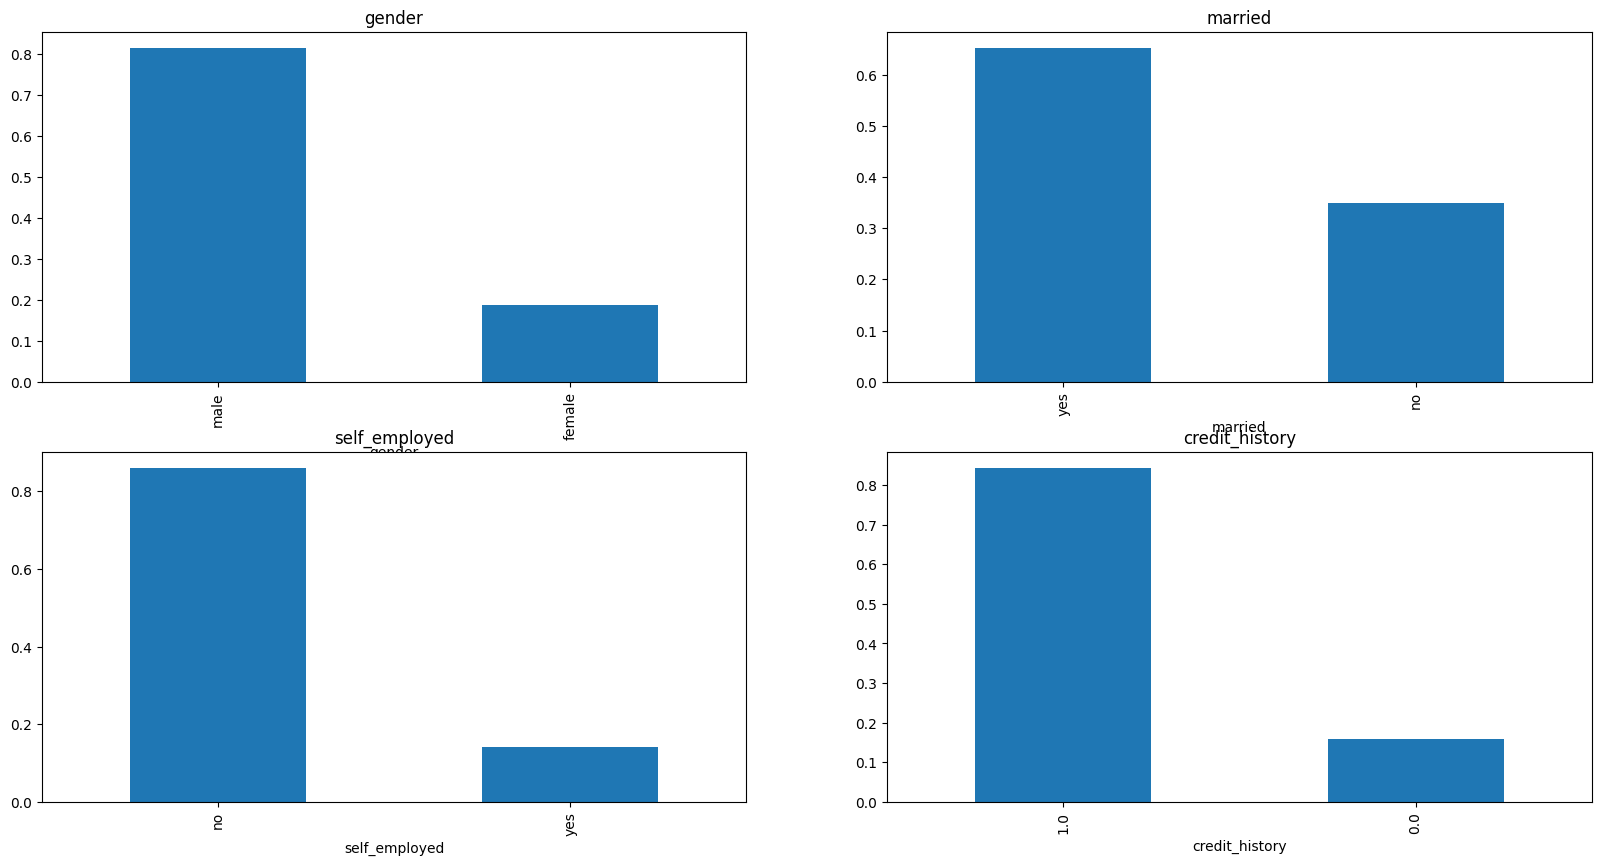

In [17]:
plt.figure(1)
plt.subplot(221)
train['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'gender') 
plt.subplot(222) 
train['married'].value_counts(normalize=True).plot.bar(title= 'married') 
plt.subplot(223) 
train['self_employed'].value_counts(normalize=True).plot.bar(title= 'self_employed') 
plt.subplot(224) 
train['credit_history'].value_counts(normalize=True).plot.bar(title= 'credit_history') 
plt.show()

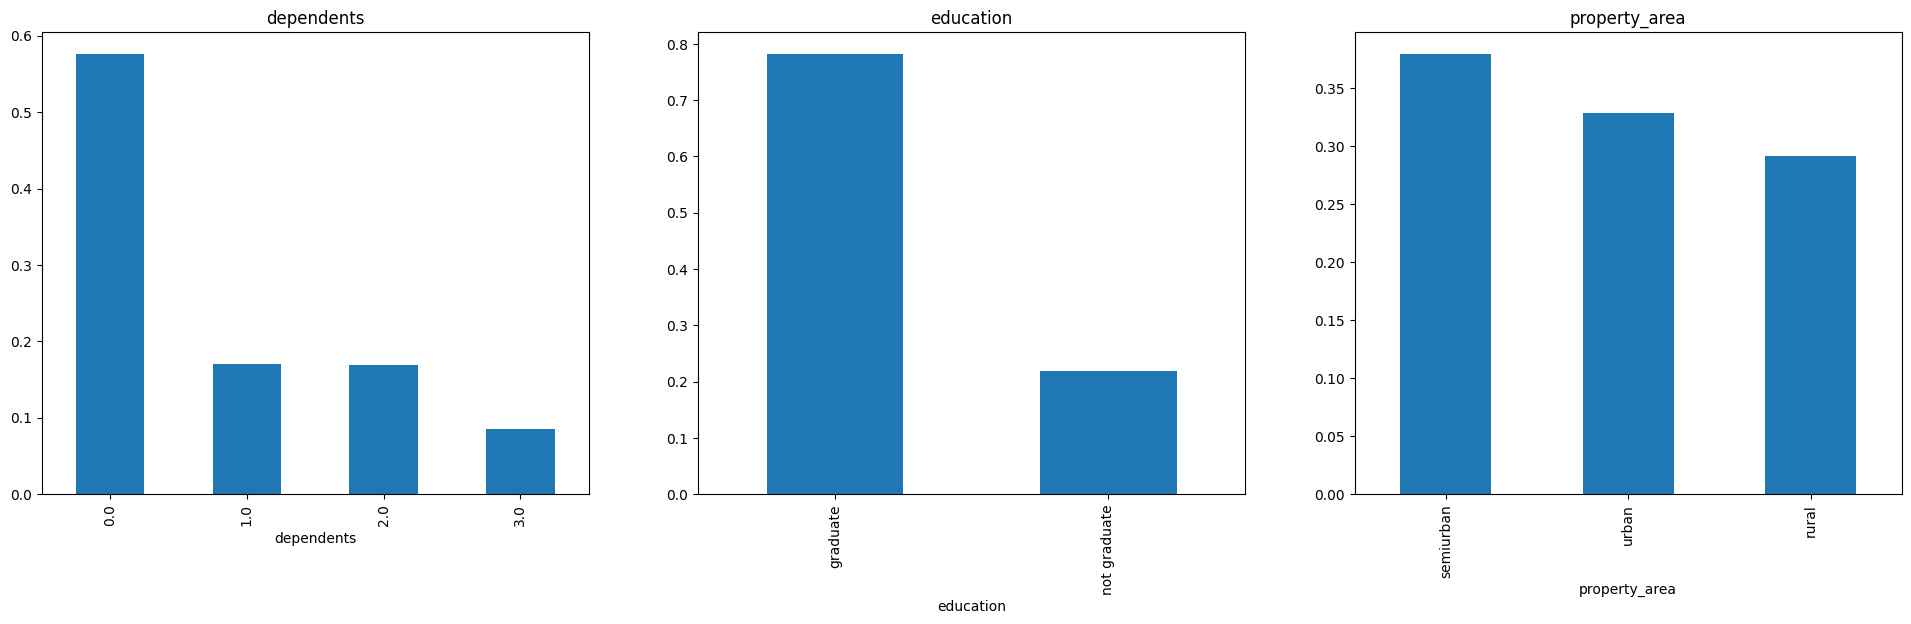

In [18]:
#Independent Variable (Ordinal)
plt.figure(1) 
plt.subplot(131)
train['dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='dependents') 
plt.subplot(132)
train['education'].value_counts(normalize=True).plot.bar(title= 'education') 
plt.subplot(133) 
train['property_area'].value_counts(normalize=True).plot.bar(title= 'property_area') 
plt.show()

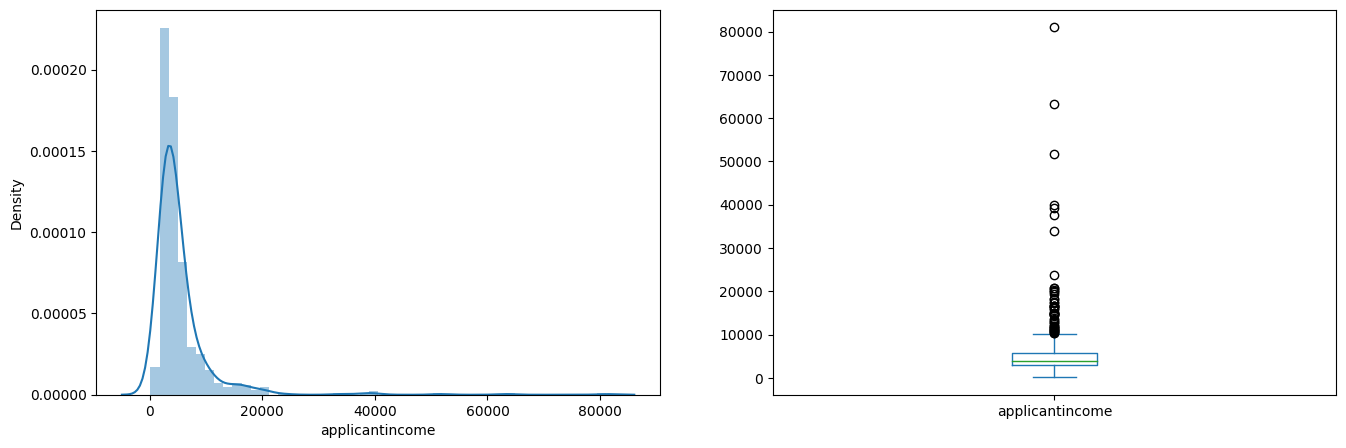

In [19]:
#Independent Variable (Numerical)
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['applicantincome']); 
plt.subplot(122) 
train['applicantincome'].plot.box(figsize=(16,5)) 
plt.show()

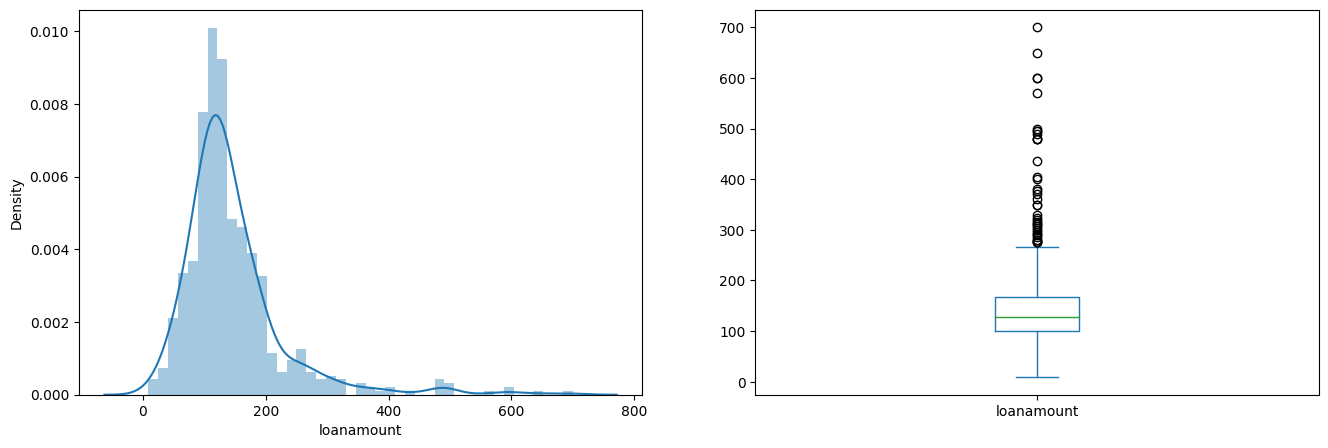

In [20]:
#distribution of the LoanAmount variable.

plt.figure(1)
plt.subplot(121)
df=train.dropna() 
sns.distplot(train['loanamount']); 
plt.subplot(122)
train['loanamount'].plot.box(figsize=(16,5)) 
plt.show()

<Axes: xlabel='gender'>

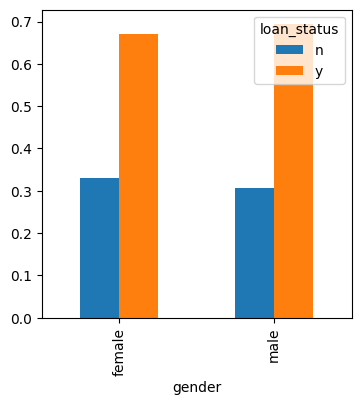

In [21]:
#Bivariate Analysis
#Categorical Independent Variable vs Target Variable
gender=pd.crosstab(train['gender'],train['loan_status']) 
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

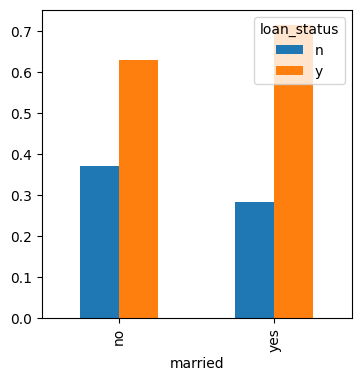

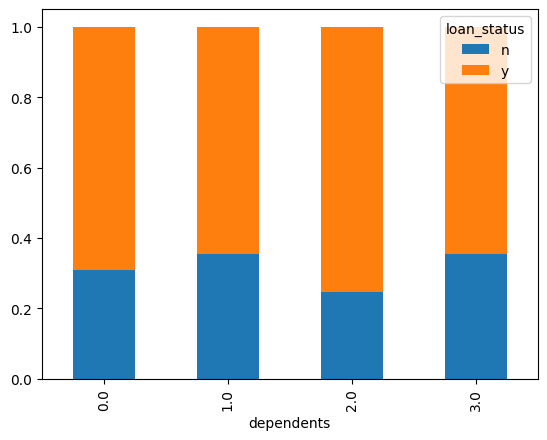

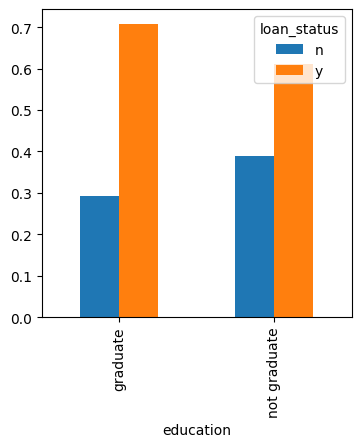

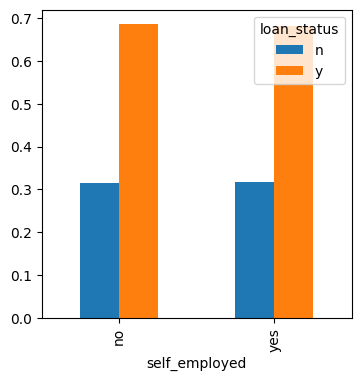

In [22]:
married=pd.crosstab(train['married'],train['loan_status']) 
dependents=pd.crosstab(train['dependents'],train['loan_status']) 
education=pd.crosstab(train['education'],train['loan_status']) 
self_employed=pd.crosstab(train['self_employed'],train['loan_status']) 
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

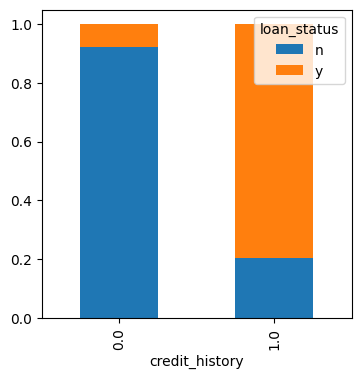

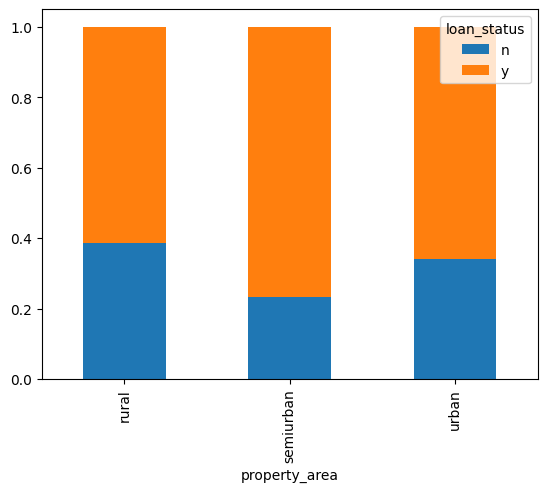

In [23]:
credit_history=pd.crosstab(train['credit_history'],train['loan_status']) 
property_area=pd.crosstab(train['property_area'],train['loan_status']) 
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<Axes: xlabel='loan_status'>

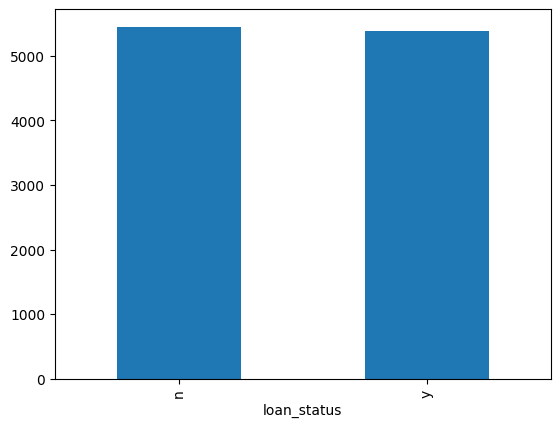

In [24]:
#Numerical Independent Variable vs Target Variable
train.groupby('loan_status')['applicantincome'].mean().plot.bar()

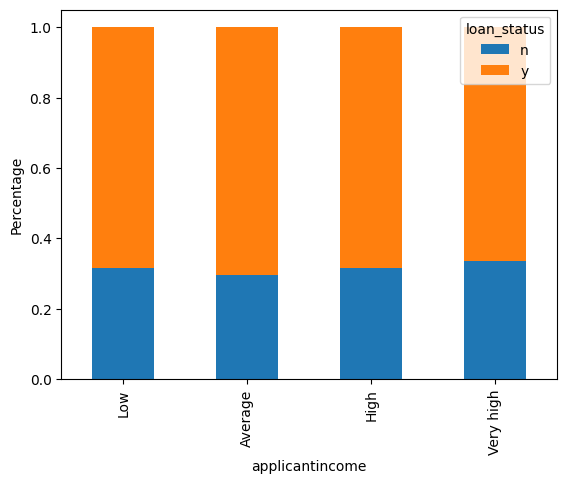

In [25]:
#applicant income variable based on the values
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['applicantincome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['loan_status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('applicantincome') 
P = plt.ylabel('Percentage')

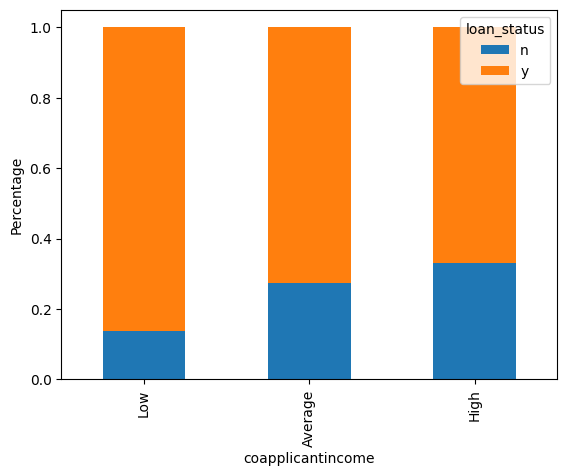

In [26]:
# applicant’s income and loan amount variable
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['coapplicantincome_bin']=pd.cut(train['coapplicantincome'],bins,labels=group)
coapplicantincome_bin=pd.crosstab(train['coapplicantincome_bin'],train['loan_status']) 
coapplicantincome_bin.div(coapplicantincome_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('coapplicantincome') 
P = plt.ylabel('Percentage')

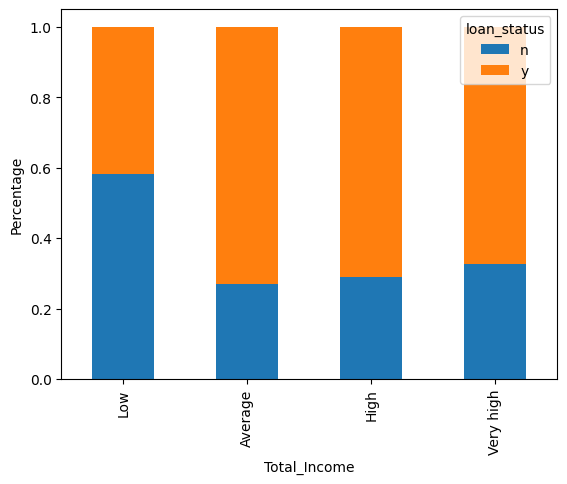

In [27]:
#Combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status
train['Total_Income']=train['applicantincome']+train['coapplicantincome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['loan_status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

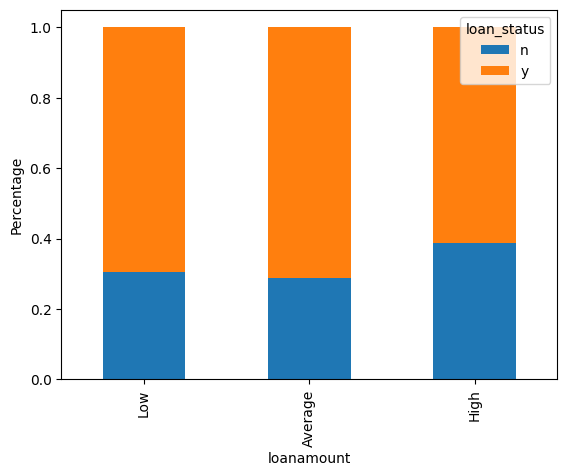

In [28]:
#compared to that of applicants with Average, High, and Very High Income
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['loanamount_bin']=pd.cut(train['loanamount'],bins,labels=group)
loanamount_bin=pd.crosstab(train['loanamount_bin'],train['loan_status']) 
loanamount_bin.div(loanamount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('loanamount') 
P = plt.ylabel('Percentage')

In [47]:
train.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [54]:
train['gender'].fillna(train['gender'].mode()[0], inplace=True)
train['married'].fillna(train['married'].mode()[0], inplace=True)
train['dependents'].fillna(train['dependents'].mode()[0], inplace=True)
train['self_employed'].fillna(train['self_employed'].mode()[0], inplace=True)
train['credit_history'].fillna(train['credit_history'].mode()[0], inplace=True)

In [55]:
train['loan_amount_term'].value_counts()

loan_amount_term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [56]:
train['loanamount'].fillna(train['loanamount'].median(), inplace=True)

In [57]:
train.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     14
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [60]:
test['gender'].fillna(train['gender'].mode()[0], inplace=True)
test['married'].fillna(train['married'].mode()[0], inplace=True)
test['dependents'].fillna(train['dependents'].mode()[0], inplace=True)
test['self_employed'].fillna(train['self_employed'].mode()[0], inplace=True)
test['credit_history'].fillna(train['credit_history'].mode()[0], inplace=True)
test['loan_amount_term'].fillna(train['loan_amount_term'].mode()[0], inplace=True)
test['loanamount'].fillna(train['loanamount'].median(), inplace=True)

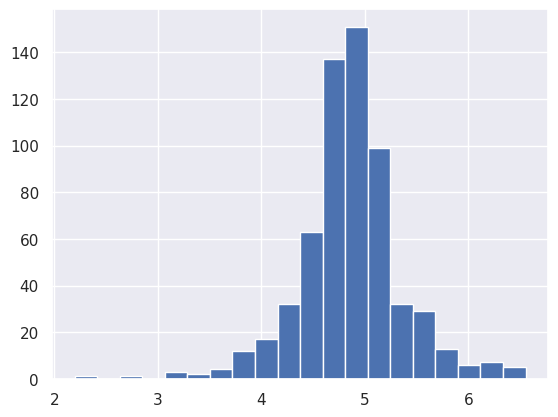

In [61]:
train['loanamount_log'] = np.log(train['loanamount']) 
train['loanamount_log'].hist(bins=20) 
test['loanamount_log'] = np.log(test['loanamount'])

In [62]:
train=train.drop('loan_id',axis=1) 
test=test.drop('loan_id',axis=1)